In [31]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split

In [20]:
train_data = pd.read_csv('data/train_data_20221117.csv', index_col = 0)
test_data = pd.read_csv('data/test_data_20221117.csv', index_col = 0)

X_train = train_data.drop(columns = 'Survived', axis = 1)
y_train = train_data['Survived']
X_test  = test_data.drop(columns = 'Survived', axis = 1)
y_test  = test_data['Survived']

In [23]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

parameters = {
    'hidden_layer_sizes': [12],
    'solver': ['adam'],
    'learning_rate': ['invscaling'],
    'max_iter': [1400]
}

clf = MLPClassifier()
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
grid_search_estimator = GridSearchCV(clf, parameters, scoring='f1', cv=stratified_10_fold_cv, return_train_score=False,
                                    verbose = 2)
grid_search_estimator.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END hidden_layer_sizes=12, learning_rate=invscaling, max_iter=1400, solver=adam; total time=   1.1s
[CV] END hidden_layer_sizes=12, learning_rate=invscaling, max_iter=1400, solver=adam; total time=   1.7s
[CV] END hidden_layer_sizes=12, learning_rate=invscaling, max_iter=1400, solver=adam; total time=   0.9s
[CV] END hidden_layer_sizes=12, learning_rate=invscaling, max_iter=1400, solver=adam; total time=   1.4s
[CV] END hidden_layer_sizes=12, learning_rate=invscaling, max_iter=1400, solver=adam; total time=   2.0s
[CV] END hidden_layer_sizes=12, learning_rate=invscaling, max_iter=1400, solver=adam; total time=   2.0s
[CV] END hidden_layer_sizes=12, learning_rate=invscaling, max_iter=1400, solver=adam; total time=   1.6s
[CV] END hidden_layer_sizes=12, learning_rate=invscaling, max_iter=1400, solver=adam; total time=   1.8s
[CV] END hidden_layer_sizes=12, learning_rate=invscaling, max_iter=1400, solver=adam; total time=  

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [12],
                         'learning_rate': ['invscaling'], 'max_iter': [1400],
                         'solver': ['adam']},
             scoring='f1', verbose=2)

In [25]:
results = pd.DataFrame(grid_search_estimator.cv_results_)
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))
display(results)
estimator = grid_search_estimator.best_estimator_

best score is 0.7488684087714537 with params {'hidden_layer_sizes': 12, 'learning_rate': 'invscaling', 'max_iter': 1400, 'solver': 'adam'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.669107,0.337258,0.007199,0.005135,12,invscaling,1400,adam,"{'hidden_layer_sizes': 12, 'learning_rate': 'i...",0.8,...,0.731707,0.693878,0.782609,0.717949,0.717949,0.608696,0.769231,0.748868,0.06667,1


In [28]:
model = MLPClassifier(**grid_search_estimator.best_params_)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=12, learning_rate='invscaling', max_iter=1400)

acc=0.8208955223880597
f1=0.7714285714285715


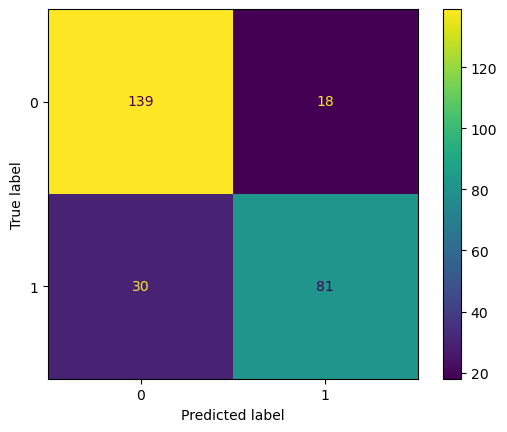

In [32]:
predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
acc = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f'{acc=}')
print(f'{f1=}')
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [7]:
for feature in X_test.columns:
    print(feature)
    for value in X_test[feature].unique():
        indices = X_test[feature] == value
        true_feature = y_test[indices]
        pred_feature = predictions[indices]
        print(' -', value, ': true = ', sum(true_feature), '\tpred = ', sum(pred_feature))

Pclass
 - 3 : true =  34 	pred =  0
 - 2 : true =  24 	pred =  0
 - 1 : true =  53 	pred =  0
SibSp
 - 1 : true =  39 	pred =  0
 - 0 : true =  68 	pred =  0
 - 2 : true =  4 	pred =  0
 - 3 : true =  0 	pred =  0
 - 4 : true =  0 	pred =  0
Parch
 - 1 : true =  18 	pred =  0
 - 0 : true =  78 	pred =  0
 - 2 : true =  14 	pred =  0
 - 3 : true =  0 	pred =  0
 - 4 : true =  0 	pred =  0
 - 5 : true =  1 	pred =  0
Age_true
 - 0 : true =  20 	pred =  0
 - 1 : true =  91 	pred =  0
AgeGroup
 - 0 : true =  11 	pred =  0
 - 3 : true =  27 	pred =  0
 - 2 : true =  26 	pred =  0
 - 1 : true =  7 	pred =  0
 - 4 : true =  30 	pred =  0
 - 5 : true =  10 	pred =  0
FareGroup
 - 2 : true =  18 	pred =  0
 - 1 : true =  14 	pred =  0
 - 3 : true =  32 	pred =  0
 - 4 : true =  24 	pred =  0
 - 0 : true =  9 	pred =  0
 - 5 : true =  14 	pred =  0
CabinLvl
 - 0 : true =  65 	pred =  0
 - 4 : true =  12 	pred =  0
 - 5 : true =  12 	pred =  0
 - 7 : true =  3 	pred =  0
 - 6 : true =  11 	pred =